Aarian Dhanani
Data Science
Presentation: https://docs.google.com/presentation/d/1Nv7xh_xfklQ3OWZ3K8Mo4n6d5VXwIlDAozIC_3Ykbv8/edit?usp=sharing

Aspects to Find:
- Mean area of the fires ✅
- Median area of the fire ✅
- Location of the fire (unit) ✅
- Number of days it takes to suppress the fire an average ✅
- Causes ✅
- Number of fires per year ✅
- Mean number of fires per year ✅
- Median number of fires per year ✅

Setting up

In [1]:
#Setting up
import pandas as pd
import os
import csv
import datetime
import matplotlib.pyplot as plt
os.system('clear')
fireData = pd.read_csv("californiaFiresDataset.csv")
print(fireData)

       OBJECTID   YEAR_ STATE AGENCY UNIT_ID     FIRE_NAME INC_NUM  \
0         21440  2020.0    CA    CDF     NEU        NELSON   13212   
1         21441  2020.0    CA    CDF     NEU       AMORUSO   11799   
2         21442  2020.0    CA    CDF     NEU        ATHENS   18493   
3         21443  2020.0    CA    CDF     NEU       FLEMING    7619   
4         21444  2020.0    CA    CDF     NEU      MELANESE    8471   
...         ...     ...   ...    ...     ...           ...     ...   
21313     42760  2019.0    CA    CCO     LAC        MUREAU     NaN   
21314     42761  2019.0    CA    LRA     NaN           OAK     NaN   
21315     42762  2019.0    CA    LRA     LDF        BARHAM     845   
21316     42763  2019.0    CA    NPS     MNP          STAR   13598   
21317     42764  2019.0    CA    LRA     LDF  SADDLE RIDGE    1582   

                   ALARM_DATE               CONT_DATE  \
0      2020/06/18 00:00:00+00  2020/06/23 00:00:00+00   
1      2020/06/01 00:00:00+00  2020/06/04 00:

Location of the fires (unit)

In [2]:
print(fireData.groupby('UNIT_ID').UNIT_ID.count())

UNIT_ID
         2
AEU    198
AFV    111
ANF    503
APF      1
      ... 
TUU    157
VLJ      1
VNC    403
WED      1
YNP    472
Name: UNIT_ID, Length: 90, dtype: int64


Mean area of the fires

In [3]:
print("The mean area of the fires in California is " + str(abs(fireData.SHAPE_Area.mean())))

The mean area of the fires in California is 12113522.155459156


Number of fires per year

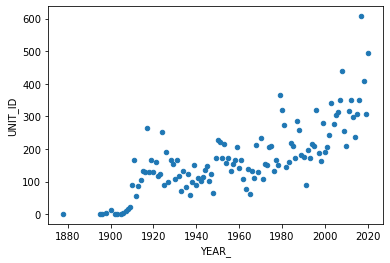

In [4]:
#Create a new dataframe for just the data that's relevant
firesPerYear = pd.DataFrame(fireData.groupby('YEAR_').UNIT_ID.count())
firesPerYear.to_csv("fireTesting.csv") #For testing purposes

#Fix the data so that it's in readable form to plot
firesPerYear.reset_index(inplace = True, drop = False)

#Plot the data
firesPerYear.plot.scatter(x = 'YEAR_', y = 'UNIT_ID')
plt.show()

Average Number of Fires Per Year

In [5]:
print(abs(firesPerYear.UNIT_ID.mean()))

172.52032520325204


Median Number of Fires Per Year

In [6]:
print(abs(firesPerYear.UNIT_ID.median()))

160.0


Median Area of the fires

In [7]:
print("The median area of the fires in California is " + str(abs(fireData.SHAPE_Area.median())))

The median area of the fires in California is 1023914.7435


Causes of the fires

                            CAUSE  UNIT_ID
0                   1 - Lightning     3453
1                    10 - Vehicle      454
2                  11 - Powerline      410
3       12 - Firefighter Training        5
4   13 - Non-Firefighter Training       11
5      14 - Unkown / Unidentified     9535
6                  15 - Structure       21
7                   16 - Aircraft       14
8    18 - Escaped Prescribed Burn       90
9     19 - Illegal Alien Campfire       17
10              2 - Equipment Use     1246
11                    3 - Infared      342
12                   4 - Campfire      380
13                     5 - Debris      723
14                 6 - Hand Drawn       80
15                      7 - Arson      902
16          8 - Playing with fire      196
17              9 - Miscellaneous     3375


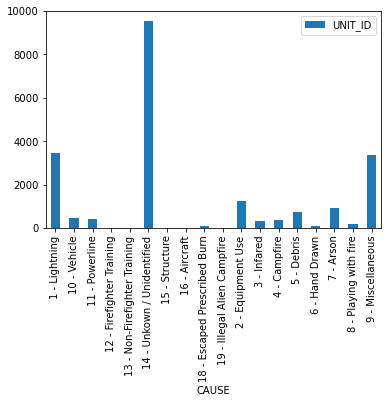

In [8]:
#Create a new dataframe with the relevant data
fireCauses = pd.DataFrame(fireData.groupby('CAUSE').UNIT_ID.count())

#Make the data readable and ready to plot
fireCauses.reset_index(inplace = True, drop = False)
print(fireCauses)

#Plot the data
fireCauses.plot.bar(x = 'CAUSE', y = 'UNIT_ID')

plt.show()

Subtract the Dates

In [9]:
fireDataWithDates = pd.read_csv("californiaFiresDataset.csv")

# del fireDataWithDates['FIRE_NAME']
# del fireDataWithDates['INC_NUM']
# del fireDataWithDates['COMMENTS']
# del fireDataWithDates['REPORT_AC']
# del fireDataWithDates['C_METHOD']
# del fireDataWithDates['OBJECTIVE']
# del fireDataWithDates['FIRE_NUM']

#Clean the data and remove rows with empty values
fireDataWithDates = fireDataWithDates.dropna()

#Convert to datetime
fireDataWithDates['ALARM_DATE'] = pd.to_datetime(fireDataWithDates['ALARM_DATE'])
fireDataWithDates['CONT_DATE'] = pd.to_datetime(fireDataWithDates['CONT_DATE'])

#Find the number of days
fireDataWithDates['NumberOfDays'] = fireDataWithDates['CONT_DATE'] - fireDataWithDates['ALARM_DATE']
print("The average number of days for an active fire is " + str(abs(fireDataWithDates.NumberOfDays.mean())))
print(fireDataWithDates)
fireDataWithDates.to_csv("fireTesting.csv") #For testing purposes


The average number of days for an active fire is 20 days 01:07:38.181818181
       OBJECTID   YEAR_ STATE AGENCY UNIT_ID FIRE_NAME INC_NUM  \
512       21957  2007.0    CA    CDF     MVU   ANGEL 3    9233   
520       21965  2007.0    CA    USF     KRN   WOFFORD       0   
534       21979  2007.0    CA    CDF     LMU    WILLOW    3020   
535       21980  2007.0    CA    CDF     LMU   LOOKOUT    4945   
536       21981  2007.0    CA    CDF     LMU      PINE    2692   
...         ...     ...   ...    ...     ...       ...     ...   
19978     41425  2016.0    CA    USF     SHU    MEADOW     825   
19979     41426  2016.0    CA    USF     SHF    GILMAN    1890   
19980     41427  2016.0    CA    USF     SHF    GILMAN    1890   
19981     41428  2015.0    CA    USF     SNF    WILLOW    1689   
20554     42001  2017.0    CA    NPS     RNP   DRAKE 2    1716   

                     ALARM_DATE                 CONT_DATE  \
512   2007-09-15 00:00:00+00:00 2007-09-25 00:00:00+00:00   
520   200

______________________________________________________________________________________________
Question to answer:
Since 2000, what have the largest issues been in terms of fire causes? Where are most of these fires starting? How can we individually analyze a certain area?

Clean up the dataset:

In [10]:
dataAnalysis = pd.read_csv("californiaFiresDataset.csv")
del dataAnalysis['FIRE_NAME']
del dataAnalysis['INC_NUM']
del dataAnalysis['COMMENTS']
del dataAnalysis['REPORT_AC']
del dataAnalysis['C_METHOD']
del dataAnalysis['OBJECTIVE']
del dataAnalysis['FIRE_NUM']
del dataAnalysis['YEAR_']
del dataAnalysis['OBJECTID']
del dataAnalysis['STATE']
del dataAnalysis['GIS_ACRES']
del dataAnalysis['SHAPE_Length']
del dataAnalysis['AGENCY']

Remove any data from before 2000

In [11]:
#Clean the data and remove rows with empty values
dataAnalysis = dataAnalysis.dropna()

#Testing
# dataAnalysis.to_csv("fireTesting.csv")
# dataTesting = pd.read_csv("fireTesting.csv")

#Removing values from before the year 2000
dataAnalysis = dataAnalysis[~(dataAnalysis['ALARM_DATE'] < '2000-01-01 00:00:00+00:00')]

#Print
print(dataAnalysis)

      UNIT_ID              ALARM_DATE               CONT_DATE  \
0         NEU  2020/06/18 00:00:00+00  2020/06/23 00:00:00+00   
1         NEU  2020/06/01 00:00:00+00  2020/06/04 00:00:00+00   
2         NEU  2020/08/10 00:00:00+00  2020/03/01 00:00:00+00   
3         NEU  2020/03/31 00:00:00+00  2020/04/01 00:00:00+00   
4         NEU  2020/04/14 00:00:00+00  2020/04/19 00:00:00+00   
...       ...                     ...                     ...   
21307     GNP  2019/10/24 00:00:00+00  2019/10/26 00:00:00+00   
21311     SMP  2019/10/10 00:00:00+00  2019/10/14 00:00:00+00   
21312     LDF  2019/10/21 00:00:00+00  2019/10/22 00:00:00+00   
21315     LDF  2019/11/09 00:00:00+00  2019/11/10 00:00:00+00   
21317     LDF  2019/10/10 00:00:00+00  2019/10/31 00:00:00+00   

                              CAUSE    SHAPE_Area  
0                    11 - Powerline -7.331347e+05  
1                 2 - Equipment Use -4.578172e+06  
2        14 - Unkown / Unidentified -1.823876e+05  
3          

Fire Causes from 2000 and beyond:

                            CAUSE  UNIT_ID
0                   1 - Lightning     1555
1                    10 - Vehicle      380
2                  11 - Powerline      305
3       12 - Firefighter Training        2
4   13 - Non-Firefighter Training        2
5      14 - Unkown / Unidentified     1559
6                  15 - Structure       17
7                   16 - Aircraft       11
8    18 - Escaped Prescribed Burn       53
9     19 - Illegal Alien Campfire       17
10              2 - Equipment Use      730
11                    3 - Infared       55
12                   4 - Campfire      179
13                     5 - Debris      263
14                 6 - Hand Drawn       41
15                      7 - Arson      375
16          8 - Playing with fire       85
17              9 - Miscellaneous      742


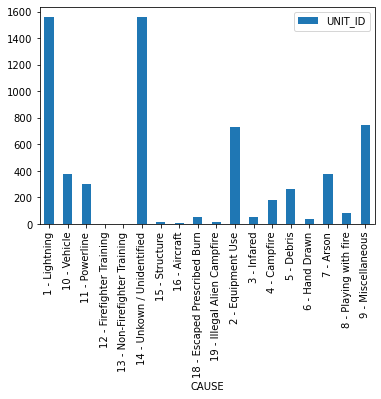

In [12]:
#Create a new dataframe with the relevant data
fireCauses = pd.DataFrame(dataAnalysis.groupby('CAUSE').UNIT_ID.count())

#Make the data readable and ready to plot
fireCauses.reset_index(inplace = True, drop = False)

#Print the data
print(fireCauses)

#Plot the data and show the graph
fireCauses.plot.bar(x = 'CAUSE', y = 'UNIT_ID')
plt.show()

Fire frequency Per Unit

         CAUSE
UNIT_ID       
LAC        302
KRN        287
LNU        279
NEU        264
SLU        223
...        ...
HPR          1
FNF          1
CRA          1
APV          1
APF          1

[87 rows x 1 columns]


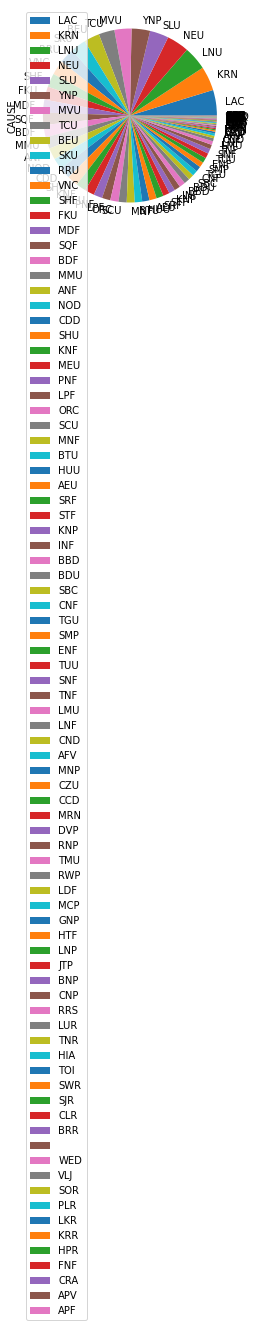

In [13]:
#Count values
unitData = pd.DataFrame(dataAnalysis.groupby('UNIT_ID').CAUSE.count())

#Testing
#unitData.to_csv("fireTesting.csv") #For testing purposes

#Sort rows
unitData = unitData.sort_values(['CAUSE','UNIT_ID'],ascending=False)

#Plot and print data
unitData.plot.pie(x = 'UNIT_ID', y = 'CAUSE')
print(unitData)

Fire Frequency Per Unit Revised

         CAUSE
UNIT_ID       
LAC        302
KRN        287
LNU        279
NEU        264
SLU        223
YNP        219
MVU        202
TCU        187
BEU        186
SKU        180
RRU        180
VNC        173
SHF        161
FKU        156
MDF        152


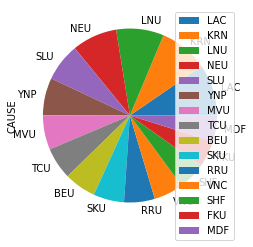

In [14]:
#Remove units with less than 150 fires reported
unitData = unitData[~(unitData['CAUSE'] < 150)]
unitData = unitData.sort_values(['CAUSE','UNIT_ID'],ascending=False)
unitData.plot.pie(x = 'UNIT_ID', y = 'CAUSE')
print(unitData)

Case Study: LAC

/var/folders/6t/5n6hzyfd7bxc1pxzzzxd788w0000gn/T/ipykernel_80829/1731600056.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LACData['ALARM_DATE'] = pd.to_datetime(LACData['ALARM_DATE'])
/var/folders/6t/5n6hzyfd7bxc1pxzzzxd788w0000gn/T/ipykernel_80829/1731600056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LACData['CONT_DATE'] = pd.to_datetime(LACData['CONT_DATE'])
/var/folders/6t/5n6hzyfd7bxc1pxzzzxd788w0000gn/T/ipykernel_80829/1731600056.py:9: SettingWithCopyWarning: 
A value is trying to be set

The average number of days each fire is active in LAC since 2000 is 1 days 02:48:33.712374581
The average area of the fires in LAC since 2000 is 6153402.467266207
      UNIT_ID                ALARM_DATE                 CONT_DATE  \
192       LAC 2020-06-08 00:00:00+00:00 2020-06-09 00:00:00+00:00   
193       LAC 2020-06-12 00:00:00+00:00 2020-06-13 00:00:00+00:00   
194       LAC 2020-07-05 00:00:00+00:00 2020-07-07 00:00:00+00:00   
195       LAC 2020-07-27 00:00:00+00:00 2020-07-28 00:00:00+00:00   
196       LAC 2020-08-01 00:00:00+00:00 2020-08-01 00:00:00+00:00   
...       ...                       ...                       ...   
20866     LAC 2018-10-31 00:00:00+00:00 2018-10-31 00:00:00+00:00   
20867     LAC 2018-11-07 00:00:00+00:00 2018-11-14 00:00:00+00:00   
20868     LAC 2018-09-09 00:00:00+00:00 2018-09-09 00:00:00+00:00   
20869     LAC 2018-12-25 00:00:00+00:00 2018-12-25 00:00:00+00:00   
21305     LAC 2019-10-24 00:00:00+00:00 2019-10-31 00:00:00+00:00   

        

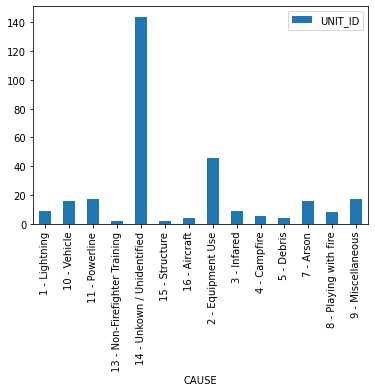

In [15]:
#Create the new dataframe
LACData = dataAnalysis[dataAnalysis.UNIT_ID == 'LAC']
# #Delete the UNIT_ID column (it should be the same for all of them)
# del LACData['UNIT_ID']

#Convert to datetime and subtract to find the number of days
LACData['ALARM_DATE'] = pd.to_datetime(LACData['ALARM_DATE'])
LACData['CONT_DATE'] = pd.to_datetime(LACData['CONT_DATE'])
LACData['NumberOfDays'] = LACData['CONT_DATE'] - LACData['ALARM_DATE']

#Clean up strange values
LACData = LACData[~(LACData['NumberOfDays'] < '0')]

#Find the average number of days
print("The average number of days each fire is active in LAC since 2000 is " + str(abs(LACData.NumberOfDays.mean())))

#Testing
LACData.to_csv("fireTesting.csv") #For testing purposes
#print(LACData)

#Find the average area
print("The average area of the fires in LAC since 2000 is " + str(abs(LACData.SHAPE_Area.mean())))

#Plot the most common causes
LACDataCauses = pd.DataFrame(LACData.groupby('CAUSE').UNIT_ID.count())
LACDataCauses.reset_index(inplace = True, drop = False)
LACDataCauses.plot.bar(x = 'CAUSE', y = 'UNIT_ID')

#Add the months
LACData['Month'] = LACData['ALARM_DATE'].dt.month
print(LACData)

#Find the most common month
LACCommonMonths = pd.DataFrame(LACData.groupby('Month').UNIT_ID.count())
LACCommonMonths.reset_index(inplace = True, drop = False)
print("The month with the greatest number of fires in LAC since 2000 is ")
print(LACCommonMonths.loc[LACCommonMonths['UNIT_ID'].idxmax()])

plt.show()